In [1]:
%pylab inline
import numpy as np

import datetime

from astropy import units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_sun, get_moon
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


In [2]:
def area_intersect(r_sun,r_moon,d):
    """
    Calculate the area of intersecting circles with radii R
    and r and separation d.

    Reference:
    Weisstein, Eric W. "Circle-Circle Intersection."
        From MathWorld--A Wolfram Web Resource.
        http://mathworld.wolfram.com/Circle-CircleIntersection.html
    """
    
    intersect = d <= r_sun + r_moon
    inset     = d <= np.abs(r_sun-r_moon)

    if not intersect:
        A = 0
    elif inset and (r_sun > r_moon):
        A = np.pi*r_sun**2 - np.pi*r_moon**2
    elif inset and (r_sun <= r_moon):
        A = np.pi*r_moon**2
    else:
        R = r_sun
        r = r_moon
        A = ( r**2 * np.arccos( (d**2 + r**2 - R**2)/(2*d*r))
            + R**2 * np.arccos( (d**2 + R**2 - r**2)/(2*d*R))
            - 0.5 * np.sqrt((-d+r+R)*(d+r-R)*(d-r+R)*(d+r+R))
            )
    return A

In [3]:
R_sun = constants.R_sun
R_moon = 1737.1 * u.km

def apparent_size(R, distance):
    return (R/distance).to(u.arcmin, u.dimensionless_angles())

In [4]:
# UACNJ Jenny Jump - Hope, NJ
# http://xjubier.free.fr/en/site_pages/solar_eclipses/TSE_2017_GoogleMapFull.html?Lat=40.90743&Lng=-74.92505&Elv=-1.0&Zoom=4&LC=1
# Obscuration: 72.284%
# Mag at Max: 0.77541
# Moon/Sun size ratio: 1.02879
lat         =  40.90743
lon         = -74.92505
height      = 300e3
date_time   = datetime.datetime(2017,8,21,18,43,13)

#ec_mag      = eclipse_calc.eclipse_mag(lat,lon,date_time,debug=True)
#print(ec_mag)

In [5]:
loc     = EarthLocation.from_geodetic(lon,lat,height)
time_aa = Time(date_time)
aaframe = AltAz(obstime=time_aa, location=loc)

sun_aa  = get_sun(time_aa).transform_to(aaframe)
moon_aa = get_moon(time_aa).transform_to(aaframe)
sep     = sun_aa.separation(moon_aa)

sunsize  = apparent_size(R_sun, sun_aa.distance)
moonsize = apparent_size(R_moon, moon_aa.distance)

In [6]:
r_sun_deg  = sunsize.to(u.degree).value
r_moon_deg = moonsize.to(u.degree).value
sep_deg    = sep.degree
intersect  = sep_deg <= r_sun_deg + r_moon_deg
inset      = sep_deg <= np.abs(r_sun_deg - r_moon_deg)

print('r_sun_deg:  {!s}'.format(r_sun_deg))
print('r_moon_deg: {!s}'.format(r_moon_deg))
print('sep_deg:    {!s}'.format(sep_deg))
print('intersect:  {!s}'.format(intersect))
print('inset:      {!s}'.format(inset))

r_sun_deg:  0.2634228271439189
r_moon_deg: 0.27136408131488576
sep_deg:    0.1523592318311164
intersect:  True
inset:      False


In [13]:
A   = area_intersect(r_sun_deg,r_moon_deg,sep_deg)
mag = A/(np.pi*r_sun_deg**2)

if sun_aa.alt.value < 18:
    mag = 0
print('mag:  {!s}'.format(mag))

mag:  0.661431784711


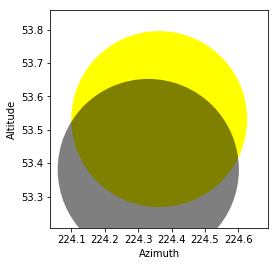

In [8]:
sun_circle  = plt.Circle((sun_aa.az.deg, sun_aa.alt.deg), 
                        sunsize.to(u.deg).value,
                        fc='yellow')
moon_circle = plt.Circle((moon_aa.az.deg, moon_aa.alt.deg), 
                         moonsize.to(u.deg).value,
                         fc='black', alpha=.5)

ax = plt.subplot(aspect=1)
ax.add_patch(sun_circle)
ax.add_patch(moon_circle)
biggest = max(sep.deg, sunsize.to(u.deg).value, moonsize.to(u.deg).value)
plt.xlim(sun_aa.az.deg-biggest*1.2, sun_aa.az.deg+biggest*1.2)
plt.ylim(sun_aa.alt.deg-biggest*1.2, sun_aa.alt.deg+biggest*1.2)

plt.xlabel('Azimuth')
plt.ylabel('Altitude');

In [12]:
sun_aa.alt.value

53.531938802458015